In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time

from fps_dfs_optimizer.src.draftkings_tools import get_contests, get_players
from fps_dfs_optimizer.src.projections import get_projections
from fps_dfs_optimizer.src.optimizer import Exposures, LineupOptimizer

In [2]:
today = dt.date.fromtimestamp(time.time())

In [3]:
today = dt.date(2020, 9, 11)

In [4]:
df_contests = get_contests(today)

In [5]:
df_contests.head(2)

,id,double_up,draft_group_id,entries,fantasy_player_points,fifty_fifty,guaranteed,head_to_head,name,payout,sport,starred,starts_at,maximum,fee,total
0,91696133,False,39558,"{'maximum': 26470, 'fee': 20.0, 'total': 4970}",20,False,True,False,NBA $450K Shootaround [$100K to 1st],450000.0,Sport.NBA,True,2020-09-11 22:30:00+00:00,26470,20.0,4970
1,91696131,False,39558,"{'maximum': 29726, 'fee': 4.0, 'total': 6657}",4,False,True,False,NBA $100K Four Point Play [20 Entry Max],100000.0,Sport.NBA,True,2020-09-11 22:30:00+00:00,29726,4.0,6657


In [6]:
group_id = df_contests.draft_group_id.unique()[0]

In [7]:
df_players = get_players(group_id)

In [8]:
points, std = get_projections(df_players)
df_players['projections'] = points
df_players['std'] = std

In [9]:
exp = Exposures(df_players)

Please fill out exposures in ../data/temp/20200910.csv


In [10]:
df_players = exp.read_exposures()

In [11]:
df_players

,display,id,position,salary,news_status,team_abbreviation,start time,projections,std,min_exp,max_exp
0,Kawhi Leonard,15329425,SF,10400,Recent,LAC,2020-09-11 22:30:00+00:00,62.211937,25.281461,0,0.4
1,Nikola Jokic,15329428,C,10000,Recent,DEN,2020-09-11 22:30:00+00:00,47.446371,27.365515,0,0.4
2,Jayson Tatum,15329430,SF/PF,9500,Recent,BOS,2020-09-12 01:00:00+00:00,35.052681,21.378599,0,0.4
3,Kyle Lowry,15329434,PG,8600,Recent,TOR,2020-09-12 01:00:00+00:00,49.759524,24.137133,0,0.4
4,Jamal Murray,15329437,PG/SG,8500,Recent,DEN,2020-09-11 22:30:00+00:00,38.539771,14.856014,0,0.4
...,...,...,...,...,...,...,...,...,...,...,...
63,Keita Bates-Diop,15329613,SF/PF,3000,None,DEN,2020-09-11 22:30:00+00:00,6.404987,6.148265,0,0.4
64,PJ Dozier,15329617,PG/SG,3000,None,DEN,2020-09-11 22:30:00+00:00,13.788409,6.993191,0,0.4
65,Tyler Cook,15329621,C,3000,None,DEN,2020-09-11 22:30:00+00:00,24.196602,5.745837,0,0.4
66,Vlatko Cancar,15329623,SF,3000,None,DEN,2020-09-11 22:30:00+00:00,13.767489,6.945856,0,0.4


In [1]:
import pandas as pd
from fps_dfs_optimizer.src.optimizer import Exposures, LineupOptimizer
from fps_dfs_optimizer.src.generator import LineupGenerator

In [2]:
df_players = pd.read_csv('../data/raw/test_20200102.csv')
df_players['start time'] = pd.to_datetime(df_players['start time'])

In [3]:
opt = LineupOptimizer(df_players, 10, verbose=True)

In [14]:
opt.solve()

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               10
Tried aggregator 1 time.
MIP Presolve eliminated 68 rows and 0 columns.
MIP Presolve modified 10 coefficients.
Reduced MIP has 208 rows, 680 columns, and 4010 nonzeros.
Reduced MIP has 680 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (1.45 ticks)
Found incumbent of value 1783.512249 after 0.03 sec. (4.12 ticks)
Probing time = 0.00 sec. (0.21 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 208 rows, 680 columns, and 4010 nonzeros.
Reduced MIP has 680 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (2.13 ticks)
Probing time = 0.00 sec. (0.21 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.02 sec. (4.68 ticks)

        Nodes  

array([[ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.

In [15]:
opt.sort_lineups()

1 Infeasible lineups dropped


,PG,SG,SF,PF,C,G,F,UTIL
0,Kemba Walker,Fred VanVleet,Gordon Hayward,Jerami Grant,Serge Ibaka,Patrick Beverley,Vlatko Cancar,Kawhi Leonard
1,Kemba Walker,Marcus Smart,Vlatko Cancar,Daniel Theis,Tyler Cook,Kyle Lowry,Jerami Grant,Kawhi Leonard
2,Kemba Walker,Jaylen Brown,Gordon Hayward,Bol Bol,Tyler Cook,Kyle Lowry,Vlatko Cancar,Nikola Jokic
3,Kyle Lowry,Marcus Smart,Jayson Tatum,Jerami Grant,Tyler Cook,Patrick Beverley,Vlatko Cancar,Kawhi Leonard
4,Kyle Lowry,Jaylen Brown,Jerami Grant,Chris Boucher,Tyler Cook,Will Barton,Daniel Theis,Nikola Jokic
5,Patrick Beverley,Jaylen Brown,OG Anunoby,Jayson Tatum,Chris Boucher,Will Barton,Bol Bol,Nikola Jokic
6,Patrick Beverley,Marcus Smart,Gordon Hayward,OG Anunoby,Serge Ibaka,Will Barton,Jayson Tatum,Michael Porter Jr.
7,Fred VanVleet,Troy Daniels,Gordon Hayward,Daniel Theis,Serge Ibaka,Will Barton,Kawhi Leonard,Montrezl Harrell
8,Kemba Walker,Fred VanVleet,OG Anunoby,Jayson Tatum,Chris Boucher,Paul George,Bol Bol,Montrezl Harrell


In [3]:
gen = LineupGenerator(df_players, n_lineups_to_generate=2000, n_lineups_to_optimize=100, batch_size=20, time_limit=1, verbose=False)

In [4]:
gen.generate()

7 Infeasible lineups dropped
12 Lineups
0 Duplicates
11 Infeasible lineups dropped
20 Lineups
0 Duplicates
2 Infeasible lineups dropped
36 Lineups
0 Duplicates
0 Infeasible lineups dropped
55 Lineups
0 Duplicates
0 Infeasible lineups dropped
71 Lineups
0 Duplicates
18 Infeasible lineups dropped
73 Lineups
0 Duplicates
4 Infeasible lineups dropped
87 Lineups
0 Duplicates
7 Infeasible lineups dropped
98 Lineups
0 Duplicates
1 Infeasible lineups dropped
116 Lineups
0 Duplicates
7 Infeasible lineups dropped
128 Lineups
0 Duplicates
1 Infeasible lineups dropped
145 Lineups
0 Duplicates
0 Infeasible lineups dropped
161 Lineups
0 Duplicates
0 Infeasible lineups dropped
176 Lineups
0 Duplicates
2 Infeasible lineups dropped
193 Lineups
0 Duplicates
0 Infeasible lineups dropped
210 Lineups
0 Duplicates
0 Infeasible lineups dropped
228 Lineups
0 Duplicates
7 Infeasible lineups dropped
238 Lineups
0 Duplicates
1 Infeasible lineups dropped
254 Lineups
0 Duplicates
6 Infeasible lineups dropped
268 L

,PG,SG,SF,PF,C,G,F,UTIL
0,Collin Sexton,Gary Harris,Kevin Porter,Harrison Barnes,Richaun Holmes,Aaron Holiday,Paul George,Kyle Lowry
1,Jalen Brunson,Gary Harris,Kevin Porter,Kawhi Leonard,Marquese Chriss,Aaron Holiday,Paul George,Kyle Lowry
2,Collin Sexton,Gary Harris,Kevin Porter,Harrison Barnes,Marquese Chriss,Kyle Lowry,Richaun Holmes,Kawhi Leonard
3,Jalen Brunson,Spencer Dinwiddie,Harrison Barnes,Marquese Chriss,Richaun Holmes,Collin Sexton,Paul George,Aaron Holiday
4,Collin Sexton,Gary Harris,Kevin Porter,Harrison Barnes,Richaun Holmes,Shabazz Napier,Paul George,Kyle Lowry
...,...,...,...,...,...,...,...,...
1995,Darius Garland,Gary Harris,Jimmy Butler,Harrison Barnes,Marquese Chriss,Spencer Dinwiddie,Robert Covington,Donovan Mitchell
1996,Spencer Dinwiddie,Gary Harris,Kevin Porter,Marquese Chriss,Bam Adebayo,Tim Frazier,Jimmy Butler,De'Aaron Fox
1997,Darius Garland,Gary Harris,Kevin Porter,Domantas Sabonis,Bismack Biyombo,De'Aaron Fox,Jimmy Butler,Donovan Mitchell
1998,De'Aaron Fox,Kevin Porter,Dillon Brooks,Bojan Bogdanovic,Bam Adebayo,Buddy Hield,Robert Covington,Shai Gilgeous-Alexander


In [4]:
# gen.df_lineups.to_csv('../data/raw/test_lineups.csv')
gen.df_lineups = pd.read_csv('../data/raw/test_lineups.csv', index_col=0)

In [5]:
players = gen.get_player_distribution(gen.df_lineups)
players

Ivica Zubac          0.3960
Bojan Bogdanovic     0.3820
DeMar DeRozan        0.3470
Jimmy Butler         0.3395
Spencer Dinwiddie    0.3065
                      ...  
PJ Washington        0.0005
Seth Curry           0.0005
OG Anunoby           0.0005
Maurice Harkless     0.0005
De'Anthony Melton    0.0005
Length: 71, dtype: float64

In [6]:
gen.get_lineup_score_dists()

,PG,SG,SF,PF,C,G,F,UTIL,mean,std
0,Collin Sexton,Gary Harris,Kevin Porter,Harrison Barnes,Richaun Holmes,Aaron Holiday,Paul George,Kyle Lowry,264.54,17.606962
1,Jalen Brunson,Gary Harris,Kevin Porter,Kawhi Leonard,Marquese Chriss,Aaron Holiday,Paul George,Kyle Lowry,262.63,14.878905
2,Collin Sexton,Gary Harris,Kevin Porter,Harrison Barnes,Marquese Chriss,Kyle Lowry,Richaun Holmes,Kawhi Leonard,264.81,17.381562
3,Jalen Brunson,Spencer Dinwiddie,Harrison Barnes,Marquese Chriss,Richaun Holmes,Collin Sexton,Paul George,Aaron Holiday,270.06,20.772067
4,Collin Sexton,Gary Harris,Kevin Porter,Harrison Barnes,Richaun Holmes,Shabazz Napier,Paul George,Kyle Lowry,263.37,17.237147
...,...,...,...,...,...,...,...,...,...,...
1995,Darius Garland,Gary Harris,Jimmy Butler,Harrison Barnes,Marquese Chriss,Spencer Dinwiddie,Robert Covington,Donovan Mitchell,279.25,20.178872
1996,Spencer Dinwiddie,Gary Harris,Kevin Porter,Marquese Chriss,Bam Adebayo,Tim Frazier,Jimmy Butler,De'Aaron Fox,277.49,19.657697
1997,Darius Garland,Gary Harris,Kevin Porter,Domantas Sabonis,Bismack Biyombo,De'Aaron Fox,Jimmy Butler,Donovan Mitchell,273.53,18.047751
1998,De'Aaron Fox,Kevin Porter,Dillon Brooks,Bojan Bogdanovic,Bam Adebayo,Buddy Hield,Robert Covington,Shai Gilgeous-Alexander,267.74,18.813339


<AxesSubplot:>

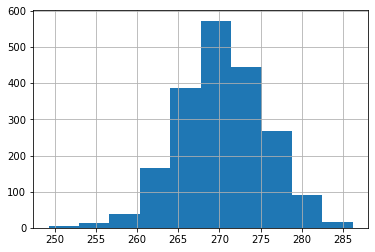

In [7]:
gen.df_lineups['mean'].hist()

In [8]:
gen.enforce_exposures()

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               60
Found incumbent of value 0.000000 after 0.00 sec. (0.03 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 120 rows and 0 columns.
Reduced MIP has 23 rows, 1000 columns, and 7424 nonzeros.
Reduced MIP has 1000 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (3.29 ticks)
Probing time = 0.00 sec. (0.41 ticks)
Tried aggregator 1 time.
Reduced MIP has 23 rows, 1000 columns, and 7424 nonzeros.
Reduced MIP has 1000 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.48 ticks)
Probing time = 0.00 sec. (0.41 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.02 sec. (1.55 ticks)

        Nodes                                         Cuts/
   Node  Left     

In [ ]:
gen.var_multiple

In [12]:
gen.results

,PG,SG,SF,PF,C,G,F,UTIL,mean,std
0,Collin Sexton,Buddy Hield,Bojan Bogdanovic,Harrison Barnes,LaMarcus Aldridge,Zach LaVine,Robert Covington,Jeremy Lamb,267.34,22.334159
1,Collin Sexton,Buddy Hield,Bojan Bogdanovic,Harrison Barnes,LaMarcus Aldridge,DeMar DeRozan,Robert Covington,T.J. Warren,268.19,21.915412
2,Collin Sexton,Dillon Brooks,Buddy Hield,Bojan Bogdanovic,LaMarcus Aldridge,Zach LaVine,Robert Covington,T.J. Warren,268.90,22.944327
3,Collin Sexton,Dillon Brooks,Buddy Hield,Robert Covington,Ivica Zubac,Zach LaVine,DeMar DeRozan,LaMarcus Aldridge,271.26,22.393919
4,Collin Sexton,Bryn Forbes,Dillon Brooks,Bojan Bogdanovic,LaMarcus Aldridge,Buddy Hield,DeMar DeRozan,Zach LaVine,270.44,21.860939
...,...,...,...,...,...,...,...,...,...,...
1995,Jalen Brunson,Jarrett Culver,Bojan Bogdanovic,Harrison Barnes,Marquese Chriss,DeMar DeRozan,Robert Covington,Luka Doncic,262.16,24.895652
1996,De'Aaron Fox,Jalen Brunson,Bojan Bogdanovic,Harrison Barnes,Domantas Sabonis,DeMar DeRozan,Jeremy Lamb,Richaun Holmes,265.98,20.779603
1997,De'Aaron Fox,Jalen Brunson,Bojan Bogdanovic,Cedi Osman,Domantas Sabonis,DeMar DeRozan,Robert Covington,Richaun Holmes,266.69,22.064583
1998,De'Aaron Fox,Jarrett Culver,Bojan Bogdanovic,Cedi Osman,Marquese Chriss,Kyle Lowry,Harrison Barnes,Domantas Sabonis,263.73,20.512161


In [14]:
player_dist = gen.get_player_distribution(gen.df_lineups)
players = list(player_dist.index)

In [17]:
gen.df_lineups

,PG,SG,SF,PF,C,G,F,UTIL,mean,std
0,Collin Sexton,Buddy Hield,Bojan Bogdanovic,Harrison Barnes,LaMarcus Aldridge,Zach LaVine,Robert Covington,Jeremy Lamb,267.34,22.334159
1,Collin Sexton,Buddy Hield,Bojan Bogdanovic,Harrison Barnes,LaMarcus Aldridge,DeMar DeRozan,Robert Covington,T.J. Warren,268.19,21.915412
2,Collin Sexton,Dillon Brooks,Buddy Hield,Bojan Bogdanovic,LaMarcus Aldridge,Zach LaVine,Robert Covington,T.J. Warren,268.90,22.944327
3,Collin Sexton,Dillon Brooks,Buddy Hield,Robert Covington,Ivica Zubac,Zach LaVine,DeMar DeRozan,LaMarcus Aldridge,271.26,22.393919
4,Collin Sexton,Bryn Forbes,Dillon Brooks,Bojan Bogdanovic,LaMarcus Aldridge,Buddy Hield,DeMar DeRozan,Zach LaVine,270.44,21.860939
...,...,...,...,...,...,...,...,...,...,...
1995,Jalen Brunson,Jarrett Culver,Bojan Bogdanovic,Harrison Barnes,Marquese Chriss,DeMar DeRozan,Robert Covington,Luka Doncic,262.16,24.895652
1996,De'Aaron Fox,Jalen Brunson,Bojan Bogdanovic,Harrison Barnes,Domantas Sabonis,DeMar DeRozan,Jeremy Lamb,Richaun Holmes,265.98,20.779603
1997,De'Aaron Fox,Jalen Brunson,Bojan Bogdanovic,Cedi Osman,Domantas Sabonis,DeMar DeRozan,Robert Covington,Richaun Holmes,266.69,22.064583
1998,De'Aaron Fox,Jarrett Culver,Bojan Bogdanovic,Cedi Osman,Marquese Chriss,Kyle Lowry,Harrison Barnes,Domantas Sabonis,263.73,20.512161
